1. 데이터 로드 및 단어 토큰화 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import nltk 
import torch 
import urllib.request 

from tqdm import tqdm 
from collections import Counter 
from nltk.tokenize import word_tokenize 
from sklearn.model_selection import train_test_split 

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
path = '/content/drive/MyDrive/data/IMDB Dataset.csv'

In [ ]:
df = pd.read_csv(path)
df[:10]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# 결측값 여부 확인 
df.isnull()
df.isnull().values.any()

False

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: >

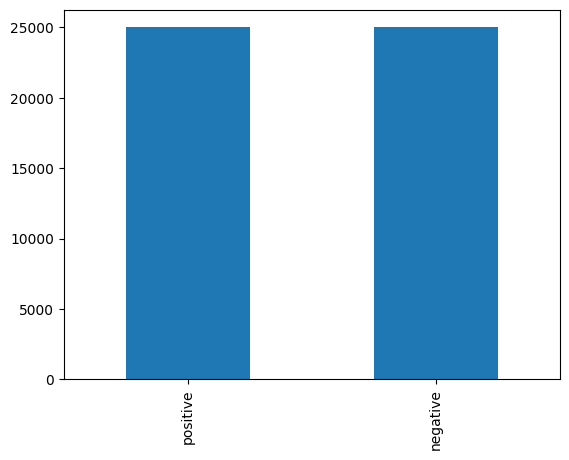

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
print('레이블 개수')
print(df.groupby('sentiment').size())
print()
print(df.groupby('sentiment').size().reset_index(name='count'))

레이블 개수
sentiment
negative    25000
positive    25000
dtype: int64

  sentiment  count
0  negative  25000
1  positive  25000


In [ ]:
# positive : 1, negative: 0 으로 변환 

df['sentiment'].replace({'positive':1, 'negative': 0})

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [ ]:
df['sentiment'].replace(['positive','negative'],[1,0])

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [ ]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1,0])

In [ ]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1


In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
x_data = df['review']
y_data = df['sentiment']

print('영화 리뷰 개수:{}'.format(len(x_data)))
print('레이블 개수:{}'.format(len(y_data)))

영화 리뷰 개수:50000
레이블 개수:50000


In [ ]:
# 훈련용 / 테스트용 데이터 구분 (8:2)

x_train, x_test,y_train,y_test= train_test_split(x_data, y_data, test_size=0.5, 
                                              random_state=42, stratify=y_data)

In [ ]:
# 훈련용 데이터 >> 훈련용 / 검증용 데이터 구분 (8:2)

x_train, x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.2, 
                                              random_state=42, stratify=y_train)

In [ ]:
print(y_train.value_counts())
print(y_train.value_counts()[0])
print(y_train.value_counts()[0] / len(y_train))
print(y_train.value_counts()[0] / len(y_train)*100)

1    10000
0    10000
Name: sentiment, dtype: int64
10000
0.5
50.0


In [ ]:
print('훈련 데이터 비율')
print(f'부정 리뷰={round(y_train.value_counts()[0] / len(y_train) *100, 3)}%')
print(f'긍정 리뷰={round(y_train.value_counts()[1] / len(y_train) *100, 3)}%')
print()

print('검증 데이터 비율')
print(f'부정 리뷰={round(y_valid.value_counts()[0] / len(y_valid) *100, 3)}%')
print(f'긍정 리뷰={round(y_valid.value_counts()[1] / len(y_valid) *100, 3)}%')
print()

print('테스트 데이터 비율')
print(f'부정 리뷰={round(y_test.value_counts()[0] / len(y_test) *100, 3)}%')
print(f'긍정 리뷰={round(y_test.value_counts()[1] / len(y_test) *100, 3)}%')
print()

훈련 데이터 비율
부정 리뷰=50.0%
긍정 리뷰=50.0%

검증 데이터 비율
부정 리뷰=50.0%
긍정 리뷰=50.0%

테스트 데이터 비율
부정 리뷰=50.0%
긍정 리뷰=50.0%



In [ ]:
def tokenize(sentences): 
  tokenized_sentences = []
  for sent in tqdm(sentences): 
     tokenized_sent = word_tokenize(sent)
     tokenized_sent =[word.lower() for word in tokenized_sent]
     tokenized_sentences.append(tokenized_sent)
  return tokenized_sentences

In [ ]:
x_train.head()

11283    REIGN OVER ME (2007) *** Adam Sandler, Don Che...
14771    The opening scene makes you feel like you're w...
38132    Of course, the story line for this movie isn't...
9132     It has singing. It has drama. It has comedy. I...
40723    This was a movie of which I kept on reading th...
Name: review, dtype: object

In [ ]:
print(tokenize(x_train.head()))

100%|██████████| 5/5 [00:00<00:00, 235.21it/s]

[['reign', 'over', 'me', '(', '2007', ')', '*', '*', '*', 'adam', 'sandler', ',', 'don', 'cheadle', ',', 'jada', 'pinkett-smith', ',', 'liv', 'tyler', ',', 'saffron', 'burrows', ',', 'donald', 'sutherland', ',', 'robert', 'klein', ',', 'melinda', 'dillon', ',', 'mike', 'binder', ',', 'jonathan', 'banks', ',', 'rae', 'allen', ',', 'paula', 'newsome', '.', 'at', 'times', 'affecting', 'and', 'at', 'times', 'middling', 'dramedy', 'about', 'a', 'thoroughly', 'depressed', 'man', 'who', 'lost', 'his', 'family', 'on', '9/11', '(', 'sandler', 'in', 'his', 'best', 'role', 'since', '``', 'punch-drunk', 'love', "''", ')', 'who', 'winds', 'up', 're-united', 'with', 'his', 'old', 'college', 'roommate', 'and', 'friend', '(', 'cheadle', 'continuing', 'to', 'do', 'impressive', 'work', 'with', 'every', 'role', 'to', 'date', ')', ',', 'a', 'well-to-do', 'dentist', 'who', 'seems', 'to', 'have', 'it', 'all', '\x96', 'family', ',', 'wealth', ',', 'happiness', '\x96', 'but', 'really', 'sees', 'an', 'ally', '

In [ ]:
tokenized_x_train = tokenize(x_train)
tokenized_x_valid = tokenize(x_valid)
tokenized_x_test = tokenize(x_test)

100%|██████████| 25000/25000 [00:42<00:00, 593.13it/s]


In [ ]:
# 상위 샘플 2개 출력 

for sent in tokenized_x_train[:2]: 
  print(sent)

['reign', 'over', 'me', '(', '2007', ')', '*', '*', '*', 'adam', 'sandler', ',', 'don', 'cheadle', ',', 'jada', 'pinkett-smith', ',', 'liv', 'tyler', ',', 'saffron', 'burrows', ',', 'donald', 'sutherland', ',', 'robert', 'klein', ',', 'melinda', 'dillon', ',', 'mike', 'binder', ',', 'jonathan', 'banks', ',', 'rae', 'allen', ',', 'paula', 'newsome', '.', 'at', 'times', 'affecting', 'and', 'at', 'times', 'middling', 'dramedy', 'about', 'a', 'thoroughly', 'depressed', 'man', 'who', 'lost', 'his', 'family', 'on', '9/11', '(', 'sandler', 'in', 'his', 'best', 'role', 'since', '``', 'punch-drunk', 'love', "''", ')', 'who', 'winds', 'up', 're-united', 'with', 'his', 'old', 'college', 'roommate', 'and', 'friend', '(', 'cheadle', 'continuing', 'to', 'do', 'impressive', 'work', 'with', 'every', 'role', 'to', 'date', ')', ',', 'a', 'well-to-do', 'dentist', 'who', 'seems', 'to', 'have', 'it', 'all', '\x96', 'family', ',', 'wealth', ',', 'happiness', '\x96', 'but', 'really', 'sees', 'an', 'ally', 'i

vocab 만들기 (단어집합 생성) 

In [ ]:
# Conter() 함수 사용 
# >> 각 단어별 빈도수 

word_list =[]

for sent in tokenized_x_train: 
  for word in sent: 
    word_list.append(word)

In [ ]:
word_list[0]

'reign'

In [ ]:
word_counts = Counter(word_list)

print('총 단어수:', len(word_counts))

총 단어수: 100172


In [ ]:
word_counts['the']

265460

In [ ]:
# word_counts 정렬, 등장빈도 상위 10개 출력 

vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장빈도수 상위 10개 단어')
print(vocab[:10])

등장빈도수 상위 10개 단어
['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>']


In [ ]:
# 등장 빈도수가 3회 미만인 단어들의 비중(비율) 확인 

threshold = 3

total_cnt = len(word_counts) # 단어 수
rare_cnt = 0 # 등장빈도수가 threshold 보다 작은 단어 개수 세기 
total_freq = 0 # 훈련 데이터 전체 단어 빈도수 총 합 
rare_freq =0 # 등장빈도수가 threshold 보다 작은 단어 등장빈도수 총 합 

# 단어, 빈도수 쌍(pair) >> key, value 

for key, value in word_counts.items():
  total_freq = total_freq + value 

  # 단어 등장빈도수가 threshold 보다 작으면 
  if (value < threshold): 
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

In [ ]:
print('단어 집합(vocab) 크기:', total_cnt)
print('등장 빈도가 %s 번 이하의 희귀 단어 수:%s'%(threshold - 1, rare_cnt))
print('단어집합에서 희귀 단어 비율:', (rare_cnt / total_cnt)*100)
print('전체 등장빈도에서 희귀 단어 등장비율:', (rare_freq / total_freq)*100)

단어 집합(vocab) 크기: 100172
등장 빈도가 2 번 이하의 희귀 단어 수:61453
단어집합에서 희귀 단어 비율: 61.34748233039172
전체 등장빈도에서 희귀 단어 등장비율: 1.3160874360328585


In [ ]:
# 등장 빈도수 2회 이하 단어 제외 

vocab_size = total_cnt - rare_cnt
print(vocab_size) # 38719

vocab = vocab[:vocab_size]
print('단어 집합의 크기', len(vocab))

38719
단어 집합의 크기 38719


In [ ]:
vocab[:10]

['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>']

In [ ]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

In [ ]:
for index, word in enumerate(vocab): 
  word_to_index[word] = index + 2

In [ ]:
vocab_size = len(word_to_index)
vocab_size  # padding token, UNK token 더해짐

38721

In [ ]:
word_to_index['<PAD>']

0

정수 인코딩

In [ ]:
def texts_to_sequence(tokenized_x_data, word_to_index): 
  encoded_x_data = []   # 정수인코딩 된 데이터 
  for sent in tokenized_x_data: 
    index_sequences = []
    for word in sent: 
      try: 
        index_sequences.append(word_to_index[word])
      except KeyError: # oov 단어 >> UNK >> 1로 mapping
        index_sequences.append(word_to_index['<UNK>']) 
    encoded_x_data.append(index_sequences)
  return encoded_x_data

In [ ]:
print(tokenized_x_train[:10])

[['reign', 'over', 'me', '(', '2007', ')', '*', '*', '*', 'adam', 'sandler', ',', 'don', 'cheadle', ',', 'jada', 'pinkett-smith', ',', 'liv', 'tyler', ',', 'saffron', 'burrows', ',', 'donald', 'sutherland', ',', 'robert', 'klein', ',', 'melinda', 'dillon', ',', 'mike', 'binder', ',', 'jonathan', 'banks', ',', 'rae', 'allen', ',', 'paula', 'newsome', '.', 'at', 'times', 'affecting', 'and', 'at', 'times', 'middling', 'dramedy', 'about', 'a', 'thoroughly', 'depressed', 'man', 'who', 'lost', 'his', 'family', 'on', '9/11', '(', 'sandler', 'in', 'his', 'best', 'role', 'since', '``', 'punch-drunk', 'love', "''", ')', 'who', 'winds', 'up', 're-united', 'with', 'his', 'old', 'college', 'roommate', 'and', 'friend', '(', 'cheadle', 'continuing', 'to', 'do', 'impressive', 'work', 'with', 'every', 'role', 'to', 'date', ')', ',', 'a', 'well-to-do', 'dentist', 'who', 'seems', 'to', 'have', 'it', 'all', '\x96', 'family', ',', 'wealth', ',', 'happiness', '\x96', 'but', 'really', 'sees', 'an', 'ally', '

In [ ]:
encoded_x_train = texts_to_sequence(tokenized_x_train, word_to_index)
print(encoded_x_train[:10])

[[5471, 148, 85, 28, 4653, 27, 120, 120, 120, 1925, 3412, 3, 1386, 6768, 3, 11592, 1, 3, 6428, 4201, 3, 22881, 18354, 3, 2444, 3328, 3, 597, 8199, 3, 9177, 5776, 3, 1891, 16341, 3, 3277, 7143, 3, 7702, 1759, 3, 7278, 1, 4, 42, 229, 6993, 5, 42, 229, 28051, 22882, 56, 6, 1529, 4654, 143, 47, 448, 37, 242, 30, 5618, 28, 3412, 15, 37, 133, 235, 248, 33, 28052, 131, 31, 27, 47, 3609, 72, 1, 23, 37, 188, 1169, 5777, 5, 449, 28, 6768, 6047, 8, 54, 1140, 180, 23, 185, 235, 8, 1347, 27, 3, 6, 19581, 4112, 47, 207, 8, 38, 14, 43, 488, 242, 3, 4070, 3, 2781, 488, 25, 76, 1131, 46, 7541, 15, 1753, 23, 37, 3088, 449, 19, 219, 850, 139, 8750, 4, 458, 5, 537, 45, 16341, 28, 47, 5778, 21, 3412, 19, 1, 449, 5, 132, 12034, 27, 23, 3063, 518, 478, 5, 1926, 18355, 2, 26, 525, 133, 64, 2, 128, 439, 1499, 2, 306, 351, 2, 251, 529, 723, 103, 46, 231, 28053, 32252, 23, 8, 14786, 6, 4365, 8, 2, 2270, 42, 567, 4], [2, 658, 150, 178, 29, 250, 50, 29, 189, 168, 6, 337, 389, 326, 4, 25, 16, 155, 127, 337, 389, 31

In [ ]:
encoded_x_train = texts_to_sequence(tokenized_x_train, word_to_index)
encoded_x_valid = texts_to_sequence(tokenized_x_valid, word_to_index)
encoded_x_test = texts_to_sequence(tokenized_x_test, word_to_index)

In [ ]:
# 상위 샘플 2개 출력
for sent in encoded_x_train[:2]: 
  print(sent)

[5471, 148, 85, 28, 4653, 27, 120, 120, 120, 1925, 3412, 3, 1386, 6768, 3, 11592, 1, 3, 6428, 4201, 3, 22881, 18354, 3, 2444, 3328, 3, 597, 8199, 3, 9177, 5776, 3, 1891, 16341, 3, 3277, 7143, 3, 7702, 1759, 3, 7278, 1, 4, 42, 229, 6993, 5, 42, 229, 28051, 22882, 56, 6, 1529, 4654, 143, 47, 448, 37, 242, 30, 5618, 28, 3412, 15, 37, 133, 235, 248, 33, 28052, 131, 31, 27, 47, 3609, 72, 1, 23, 37, 188, 1169, 5777, 5, 449, 28, 6768, 6047, 8, 54, 1140, 180, 23, 185, 235, 8, 1347, 27, 3, 6, 19581, 4112, 47, 207, 8, 38, 14, 43, 488, 242, 3, 4070, 3, 2781, 488, 25, 76, 1131, 46, 7541, 15, 1753, 23, 37, 3088, 449, 19, 219, 850, 139, 8750, 4, 458, 5, 537, 45, 16341, 28, 47, 5778, 21, 3412, 19, 1, 449, 5, 132, 12034, 27, 23, 3063, 518, 478, 5, 1926, 18355, 2, 26, 525, 133, 64, 2, 128, 439, 1499, 2, 306, 351, 2, 251, 529, 723, 103, 46, 231, 28053, 32252, 23, 8, 14786, 6, 4365, 8, 2, 2270, 42, 567, 4]
[2, 658, 150, 178, 29, 250, 50, 29, 189, 168, 6, 337, 389, 326, 4, 25, 16, 155, 127, 337, 389, 310,

In [ ]:
index_to_word = {}

for key, value in word_to_index.items():
  index_to_word[value] = key 

In [ ]:
print(encoded_x_train[0])

[5471, 148, 85, 28, 4653, 27, 120, 120, 120, 1925, 3412, 3, 1386, 6768, 3, 11592, 1, 3, 6428, 4201, 3, 22881, 18354, 3, 2444, 3328, 3, 597, 8199, 3, 9177, 5776, 3, 1891, 16341, 3, 3277, 7143, 3, 7702, 1759, 3, 7278, 1, 4, 42, 229, 6993, 5, 42, 229, 28051, 22882, 56, 6, 1529, 4654, 143, 47, 448, 37, 242, 30, 5618, 28, 3412, 15, 37, 133, 235, 248, 33, 28052, 131, 31, 27, 47, 3609, 72, 1, 23, 37, 188, 1169, 5777, 5, 449, 28, 6768, 6047, 8, 54, 1140, 180, 23, 185, 235, 8, 1347, 27, 3, 6, 19581, 4112, 47, 207, 8, 38, 14, 43, 488, 242, 3, 4070, 3, 2781, 488, 25, 76, 1131, 46, 7541, 15, 1753, 23, 37, 3088, 449, 19, 219, 850, 139, 8750, 4, 458, 5, 537, 45, 16341, 28, 47, 5778, 21, 3412, 19, 1, 449, 5, 132, 12034, 27, 23, 3063, 518, 478, 5, 1926, 18355, 2, 26, 525, 133, 64, 2, 128, 439, 1499, 2, 306, 351, 2, 251, 529, 723, 103, 46, 231, 28053, 32252, 23, 8, 14786, 6, 4365, 8, 2, 2270, 42, 567, 4]


In [ ]:
print([index_to_word[word] for word in encoded_x_train[0]])

['reign', 'over', 'me', '(', '2007', ')', '*', '*', '*', 'adam', 'sandler', ',', 'don', 'cheadle', ',', 'jada', '<UNK>', ',', 'liv', 'tyler', ',', 'saffron', 'burrows', ',', 'donald', 'sutherland', ',', 'robert', 'klein', ',', 'melinda', 'dillon', ',', 'mike', 'binder', ',', 'jonathan', 'banks', ',', 'rae', 'allen', ',', 'paula', '<UNK>', '.', 'at', 'times', 'affecting', 'and', 'at', 'times', 'middling', 'dramedy', 'about', 'a', 'thoroughly', 'depressed', 'man', 'who', 'lost', 'his', 'family', 'on', '9/11', '(', 'sandler', 'in', 'his', 'best', 'role', 'since', '``', 'punch-drunk', 'love', "''", ')', 'who', 'winds', 'up', '<UNK>', 'with', 'his', 'old', 'college', 'roommate', 'and', 'friend', '(', 'cheadle', 'continuing', 'to', 'do', 'impressive', 'work', 'with', 'every', 'role', 'to', 'date', ')', ',', 'a', 'well-to-do', 'dentist', 'who', 'seems', 'to', 'have', 'it', 'all', '\x96', 'family', ',', 'wealth', ',', 'happiness', '\x96', 'but', 'really', 'sees', 'an', 'ally', 'in', 'freedom',

In [ ]:
decoded_sample = [index_to_word[word] for word in encoded_x_train[0]]

In [ ]:
print('기존의 첫번째 샘플:', tokenized_x_train[0])
print('복원된 첫번째 샘플:', decoded_sample)

기존의 첫번째 샘플: ['reign', 'over', 'me', '(', '2007', ')', '*', '*', '*', 'adam', 'sandler', ',', 'don', 'cheadle', ',', 'jada', 'pinkett-smith', ',', 'liv', 'tyler', ',', 'saffron', 'burrows', ',', 'donald', 'sutherland', ',', 'robert', 'klein', ',', 'melinda', 'dillon', ',', 'mike', 'binder', ',', 'jonathan', 'banks', ',', 'rae', 'allen', ',', 'paula', 'newsome', '.', 'at', 'times', 'affecting', 'and', 'at', 'times', 'middling', 'dramedy', 'about', 'a', 'thoroughly', 'depressed', 'man', 'who', 'lost', 'his', 'family', 'on', '9/11', '(', 'sandler', 'in', 'his', 'best', 'role', 'since', '``', 'punch-drunk', 'love', "''", ')', 'who', 'winds', 'up', 're-united', 'with', 'his', 'old', 'college', 'roommate', 'and', 'friend', '(', 'cheadle', 'continuing', 'to', 'do', 'impressive', 'work', 'with', 'every', 'role', 'to', 'date', ')', ',', 'a', 'well-to-do', 'dentist', 'who', 'seems', 'to', 'have', 'it', 'all', '\x96', 'family', ',', 'wealth', ',', 'happiness', '\x96', 'but', 'really', 'sees', 'an'

패딩(padding)

리뷰의 최대 길이: 2562
리뷰의 최대 길이: 279.0886


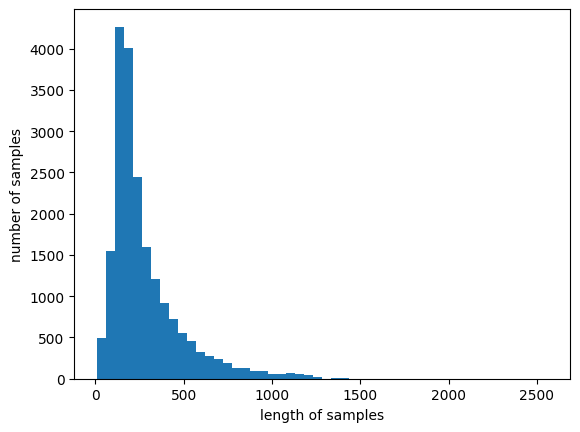

In [ ]:
print('리뷰의 최대 길이:', max(len(review) for review in encoded_x_train))
print('리뷰의 최대 길이:', sum(map(len, encoded_x_train))/len(encoded_x_train))

plt.hist([len(review) for review in encoded_x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 전체 샘플 중 길이가 max_len 이하 샘플 비율 확인하는 함수 생성 

def below_threshold_len(max_len, nested_list): 
  count = 0
  for sentence in nested_list: 
    if (len(sentence) <= max_len):
      count = count+1
  print('전체 샘플 중 길이가 %s 이하인 샘플 비율:%s'%(max_len, 
                                       (count/len(nested_list))*100))

In [ ]:
max_len = 500

below_threshold_len(max_len, encoded_x_train)
# 500으로 padding 할 경우, 약 88% 샘플은 그대로 보존   

전체 샘플 중 길이가 500 이하인 샘플 비율:87.8


In [ ]:
len(encoded_x_train)

20000

In [ ]:
print(np.zeros((len(encoded_x_train), max_len)))
print(np.zeros((len(encoded_x_train), max_len)).shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(20000, 500)


In [ ]:
def pad_sequences(sentences, max_len): 
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences): 
    if len(sentence) != 0: 
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

In [ ]:
pad_sequences(encoded_x_train, max_len=max_len)

array([[5471,  148,   85, ...,    0,    0,    0],
       [   2,  658,  150, ...,    0,    0,    0],
       [   7,  279,    3, ...,    0,    0,    0],
       ...,
       [  51,   99,   39, ...,    0,    0,    0],
       [  14,   19,  174, ...,    0,    0,    0],
       [ 408,    3,   46, ...,    0,    0,    0]])

In [ ]:
padded_x_train = pad_sequences(encoded_x_train, max_len=max_len)
padded_x_valid = pad_sequences(encoded_x_valid, max_len=max_len)
padded_x_test = pad_sequences(encoded_x_test, max_len=max_len)

In [ ]:
print('훈련 데이터 크기:', padded_x_train.shape)
print('검증 데이터 크기:', padded_x_valid.shape)
print('테스트 데이터 크기:', padded_x_test.shape)

훈련 데이터 크기: (20000, 500)
검증 데이터 크기: (5000, 500)
테스트 데이터 크기: (25000, 500)


In [ ]:
# 첫번째 샘플 길이 
print(len(padded_x_train[0]))
print()
# 첫번째 샘플 
print(padded_x_train[0])

500

[ 5471   148    85    28  4653    27   120   120   120  1925  3412     3
  1386  6768     3 11592     1     3  6428  4201     3 22881 18354     3
  2444  3328     3   597  8199     3  9177  5776     3  1891 16341     3
  3277  7143     3  7702  1759     3  7278     1     4    42   229  6993
     5    42   229 28051 22882    56     6  1529  4654   143    47   448
    37   242    30  5618    28  3412    15    37   133   235   248    33
 28052   131    31    27    47  3609    72     1    23    37   188  1169
  5777     5   449    28  6768  6047     8    54  1140   180    23   185
   235     8  1347    27     3     6 19581  4112    47   207     8    38
    14    43   488   242     3  4070     3  2781   488    25    76  1131
    46  7541    15  1753    23    37  3088   449    19   219   850   139
  8750     4   458     5   537    45 16341    28    47  5778    21  3412
    19     1   449     5   132 12034    27    23  3063   518   478     5
  1926 18355     2    26   525   133    64    

모델링

In [ ]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F

In [ ]:
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))

In [ ]:
train_label_tensor[:5]

tensor([1, 0, 1, 1, 1])

In [ ]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
class TextClassifier(nn.Module): 
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim): 
    super(TextClassifier, self).__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x): 
    # x : (batch_size, seq_length)
    # 입력값 (배치크기, 문장길이)
    embedded  = self.embedding(x) 
    # 임베딩된 벡터값(숫자)으로 변환 
    # (batch_size, seq_length, embedding_dim)
    # (배치크기, 문장길이, 임베딩 벡터 차원)

    # 마지막 시점의 은닉상태(hidden state)값과 출력층 연결 
    gru_out, hidden = self.gru(embedded)
    # gru_out: (batch_size, seq_length, hidden_dim)
    # hidden_dim: (1, batch_size, hidden_dim)

    # 마지막 은닉상태 값만 전달함 
    # 즉, 모든 시점(문장 길이) 존재 안 함, 단 하나만 존재 
    last_hidden = hidden.squeeze(0)
    # (batch_size, hidden_dim)
    logits = self.fc(last_hidden)
    # (batch_size, output_dim)
    # (배치크기, 분류하고자 하는 카테고리 수)
    return logits

In [ ]:
# 각 데이터를 배치 단위로 데이터 묶음을 꺼내주는 데이터 로더에 전달 

encoded_train = torch.tensor(padded_x_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, 
                                               train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True,
                                               batch_size=32)

encoded_test = torch.tensor(padded_x_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, 
                                               test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True,
                                               batch_size=32)

encoded_valid = torch.tensor(padded_x_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, 
                                               valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True,
                                               batch_size=32)

In [ ]:
print(len(encoded_x_train))
print(len(encoded_x_train) / 32)

# 훈련 데이터 샘플 개수 : 20000 
# 배치 사이즈 32로 할 경우, 625 
# >> 32개씩 묶인 데이터 묶음이 625개 생김 

20000
625.0


In [ ]:
num_epochs = 5
total_batch = len(train_dataloader)
print('총 배치 수:{}'.format(total_batch))

총 배치 수:625


In [ ]:
embedding_dim = 100  
# 임베딩 벡터 차원 100으로 설정 
hidden_dim = 128 
# 은닉상태의 차원 128 설정 
output_dim = 2 
# 출력층 크기(분류해야할 카테고리 개수)
learning_rate = 0.01
num_epochs = 10

In [ ]:
model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)

TextClassifier(
  (embedding): Embedding(38721, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
# 손실함수, 최적화 함수 설정
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def calculate_accuracy(logits, labels): 
   predicted = torch.argmax(logits, dim=1)
   # dim=1 : 두번째 차원(행)을 따라 최대값 찾기 
   correct = (predicted == labels).sum().item()
   total = labels.size(0) 
   # labels의 첫번째 차원의 크기 반환 
   accuracy = correct/total
   return accuracy

1. model.eval() (평가를 위해 필수)
- 모델 평가 모드 설정 
- 모델 내부 모든 layer 에 대해서 평가모드 활성화 됨

2. with torch.no_grad() : 옵션같은 개념 
- 자동 미분 엔진에서 gradient 계산 비활성화함 
- 평가 중에는 기울기 계산할 필요가 없음 >> 메모리 절약, 속도가 빨라짐 

In [ ]:
def evaluate(model, valid_dataloader, criterion, device): 
  val_loss = 0 
  val_correct = 0
  val_total = 0 

  model.eval() #(****)
  with torch.no_grad(): 
    # 데이터로더로부터 배치 크기만큼 데이터를 연속으로 load 
    for batch_x, batch_y in valid_dataloader: 
       batch_x, batch_y = batch_x.to(device), batch_y.to(device)

       # 모델의 예측값 
       logits = model(batch_x)

       # 손실 계산 
       loss = criterion(logits, batch_y)

       # 정확도와 손실 계산 
       val_loss += loss.item()
       # 검증 데이터셋에서 모델이 정확하게 예측한 샘플 수 계산하는 코드 
       val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
       # batch_y.size(0) : batch  내 샘플 수 
       # 이전에 계산한 검증 데이터 셋에 정확히 예측한 샘플 수 더함
       val_total += batch_y.size(0)
      

  val_accuracy = val_correct / val_total    
  val_loss /= len(valid_dataloader)

  return val_loss, val_accuracy 

# Training Loop
best_val_loss = float('inf')
# 가장 작은 값으로 초기화 (부동 소수점수)

for epoch in range(num_epochs): 
  # training 
  train_loss = 0 
  train_correct = 0 
  train_total = 0 
  model.train()

  for batch_x, batch_y in train_dataloader: 

    batch_x, batch_y = batch_x.to(device), batch_y.to(device)
    logits = model(batch_x)
    loss = criterion(logits, batch_y)
     
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
    train_total += batch_y.size(0)

  train_accuracy = train_correct / train_total
  train_loss /= len(train_dataloader)

  #validation 
  val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

  print(f'Epoch {epoch+1}/{num_epochs}:')
  print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
  print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

  if val_loss < best_val_loss: 
    print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
    best_val_loss = val_loss
    torch.save(model.state_dict(), 'best_model_checkpoint.pth')

Epoch 1/10:
Train Loss: 0.6974, Train Accuracy: 0.5038
Validation Loss: 0.6969, Validation Accuracy: 0.5002
Validation loss improved from inf to 0.6969. 체크포인트를 저장합니다.
Epoch 2/10:
Train Loss: 0.6925, Train Accuracy: 0.5125
Validation Loss: 0.6941, Validation Accuracy: 0.4994
Validation loss improved from 0.6969 to 0.6941. 체크포인트를 저장합니다.
Epoch 3/10:
Train Loss: 0.6788, Train Accuracy: 0.5471
Validation Loss: 0.6834, Validation Accuracy: 0.5754
Validation loss improved from 0.6941 to 0.6834. 체크포인트를 저장합니다.
Epoch 4/10:
Train Loss: 0.5112, Train Accuracy: 0.7570
Validation Loss: 0.4096, Validation Accuracy: 0.8216
Validation loss improved from 0.6834 to 0.4096. 체크포인트를 저장합니다.
Epoch 5/10:
Train Loss: 0.2596, Train Accuracy: 0.8984
Validation Loss: 0.3183, Validation Accuracy: 0.8664
Validation loss improved from 0.4096 to 0.3183. 체크포인트를 저장합니다.
Epoch 6/10:
Train Loss: 0.1413, Train Accuracy: 0.9519
Validation Loss: 0.3492, Validation Accuracy: 0.8676
Epoch 7/10:
Train Loss: 0.0738, Train Accurac

모델 로드 및 평가 

In [ ]:
# 모델 로드 
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델 device에 올립니다 
model.to(device)

# 검증 데이터에 대한 정확도, 손실 계산 
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

In [ ]:
print(f'Best model validataion loss: {val_loss:.4f}')
print(f'Best model validataion accuracy: {val_accuracy:.4f}')

Best model validataion loss: 0.3175
Best model validataion accuracy: 0.8664


In [ ]:
# 테스트 데이터에 대한 정확도, 손실 계산 
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

In [ ]:
# 테스트 데이터에 대한 정확도와 손실 계산 
print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')

Best model test loss: 0.3051
Best model test accuracy: 0.8738


Inference (테스트)

In [ ]:
index_to_tag = {0: '부정', 1:'긍정'}

In [ ]:
def predict(text, model, word_to_index, index_to_tag): 
  model.eval()

  # 입력된 텍스트 >> 토큰화 
  tokens = word_tokenize(text)
  token_indices = [word_to_index.get(token.lower(), 1) for token in tokens]

  # token >> tensor 변환 
  input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)
  # (1, seq_length)

  # input tensor >> 모델에 적용 
  with torch.no_grad(): 
    logits = model(input_tensor)  
    # (1, output_dim)
  
  # 예측된 클래스(class) (0,1)형태 반환 
  predicted_index = torch.argmax(logits, dim=1) 

  # predicted_index >> 상응하는 tag인 (0,1)로 변환 
  predicted_tag = index_to_tag[predicted_index.item()]

  return predicted_tag


In [ ]:
test_input =\
'''
Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight
Shoes on, get up in the morn'
Cup of milk, let's rock and roll
King Kong, kick the drum, rolling on like a Rolling Stone
Sing song when I'm walking home
Jump up to the top, LeBron
Ding dong, call me on my phone
Ice tea and a game of ping pong, huh
This is getting heavy
Can you hear the bass boom? I'm ready (woo hoo)
Life is sweet as honey
Yeah, this beat cha-ching like money, huh
Disco overload, I'm into that, I'm good to go
I'm diamond, you know I glow up
Hey, so let's go
'Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight (hey)
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa oh oh
Bring a friend, join the crowd
Whoever wanna come along
Word up, talk the talk
Just move like we off the wall
Day or night, the sky's alight
So we dance to the break of dawn
Ladies and gentlemen, I got the medicine
So you should keep ya eyes on the ball, huh
This is getting heavy
Can you hear the bass boom? I'm ready (woo hoo)
Life is sweet as honey
Yeah, this beat cha-ching like money
Disco overload, I'm into that, I'm good to go
I'm diamond, you know I glow up
Let's go
'Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight (hey)
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa oh oh
Dy-na-na-na, na-na, na-na-na, na-na-na, life is dynamite
Dy-na-na-na, na-na, na-na-na, na-na-na, life is dynamite
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa oh oh
Dy-na-na-na, na-na, na-na, ayy
Dy-na-na-na, na-na, na-na, ayy
Dy-na-na-na, na-na, na-na, ayy
Light it up like dynamite
Dy-na-na-na, na-na, na-na, ayy
Dy-na-na-na, na-na, na-na, ayy
Dy-na-na-na, na-na, na-na, ayy
Light it up like dynamite
'Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight
Shining through the city with a little funk and soul
So I'ma light it up like dynamite (this is ah)
'Cause I-I-I'm in the stars tonight
So watch me bring the fire and set the night alight (alight, oh)
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa (light it up like dynamite)
Dy-na-na-na, na-na, na-na-na, na-na-na, life is dynamite
Dy-na-na-na, na-na, na-na-na, na-na-na, life is dynamite
Shining through the city with a little funk and soul
So I'ma light it up like dynamite, whoa oh oh'''

In [ ]:
predict(test_input, model, word_to_index, index_to_tag)

'긍정'

In [ ]:
test_input_n2 =\
'''
I feel lonely
'''

In [ ]:
predict(test_input_n2, model, word_to_index, index_to_tag)

'부정'